<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [6]:
### Type your code here

tr_mcc_codes = pd.read_csv('C:/Users/cated/OneDrive/Документы/transact/tr_mcc_codes.csv', sep=';', encoding = 'utf-8')
tr_types = pd.read_csv('C:/Users/cated/OneDrive/Документы/transact/tr_types.csv', sep=';', encoding = 'utf-8')
transactions = pd.read_csv('C:/Users/cated/OneDrive/Документы/transact/transactions.csv', sep=',', nrows=1000000, encoding = 'utf-8')
customers_gender_train = pd.read_csv('C:/Users/cated/OneDrive/Документы/transact/gender_train.csv', sep=',', encoding = 'utf-8')

#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [23]:
### Type your code here

# Выведем информацию о столбцах transactions, чтобы убедиться в наличии столбца 'mcc_code'
print(transactions.columns)

# Соединение с tr_mcc_codes и удаление дубликатов
tran = pd.merge(transactions, tr_mcc_codes, how='inner', on='mcc_code')

# Выведем количество строк после каждого этапа
print("После соединения с  transactions и tr_mcc_codes :", tran.shape[0])

# Соединение с tr_types и удаление дубликатов
tran1 = pd.merge(tran, tr_types, how='inner', on='tr_type')

# Выведем количество строк после каждого этапа
print("После соединения с transactions и tr_types:", tran1.shape[0])

# Соединение с customers_gender_train через left join (если у вас есть customers_gender_train)
tran2 = pd.merge(tran1, customers_gender_train, how='left', on='customer_id')

print("После соединения с transactions и customers_gender_train:", tran2.shape[0])



# Проверка, что количество строк равно 999584
assert tran2.shape[0] == 999584

# Вывод результата
print("Результат соединения:")
print(tran2.head())
global tran2

Index(['customer_id', 'tr_datetime', 'mcc_code', 'tr_type', 'amount',
       'term_id'],
      dtype='object')
После соединения с  transactions и tr_mcc_codes : 1000000
После соединения с transactions и tr_types: 999584
После соединения с transactions и customers_gender_train: 999584
Результат соединения:
   customer_id  tr_datetime  mcc_code  tr_type   amount term_id  \
0     39026145   0 10:23:26      4814     1030 -2245.92     NaN   
1     39026145   6 07:08:31      4814     1030 -5614.79     NaN   
2     39026145   8 07:06:10      4814     1030 -1122.96     NaN   
3     39026145  11 08:49:03      4814     1030 -2245.92     NaN   
4     39026145  11 14:12:08      4814     1030 -2245.92     NaN   

                                     mcc_description  \
0  Звонки с использованием телефонов, считывающих...   
1  Звонки с использованием телефонов, считывающих...   
2  Звонки с использованием телефонов, считывающих...   
3  Звонки с использованием телефонов, считывающих...   
4  Звонки 

#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [21]:
### print(tran2.head())


male_data = tran2[tran2['gender'] == 1.0]

female_data = tran2[tran2['gender'] == 0.0]

# Вычисление средних трат для мужчин и женщин
average_amount_male = male_data['amount'].mean()
average_amount_female = female_data['amount'].mean()

# Вычисление модуля разницы
difference = abs(average_amount_male - average_amount_female)

# Вывод результата с округлением до двух знаков после запятой
result = '{:.2f}'.format(difference)
print(result)

2633.02


#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [26]:
### Type your code here


# Создание нового столбца mcc_code+tr_type
tran2['mcc_tr_type'] = tran2['mcc_code'].astype(str) + tran2['tr_type'].astype(str)

# Фильтрация данных по отрицательным значениям amount
negative_amount_data = tran2[tran2['amount'] < 0]

# Группировка по mcc_tr_type и вычисление дисперсии и количества наблюдений
result = negative_amount_data.groupby('mcc_tr_type')['amount'].agg(['var', 'count'])

# Фильтрация по количеству наблюдений >= 10
result = result[result['count'] >= 10]

# Вычисление отношения максимальной дисперсии к минимальной
ratio = result['var'].max() / result['var'].min()

# Вывод результата без дробной части и округленного до ближайшего целого
result_integer = round(ratio)
print(result_integer)

9170599


#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [15]:
### Type your code here

# Фильтрация только положительных сумм и группировка по типу транзакции и полу
positive_income = tran2[tran2['amount'] > 0]
grouped_data = positive_income.groupby(['tr_type', 'gender'])['amount'].max().reset_index()

# Выбор по 5 минимальных транзакций для мужчин и женщин
top5_male_transactions = grouped_data[grouped_data['gender'] == 'M'].nlargest(5, 'amount')
top5_female_transactions = grouped_data[grouped_data['gender'] == 'F'].nlargest(5, 'amount')

# Выделение транзакций, которые встречаются одновременно у мужчин и у женщин
common_transactions = pd.merge(top5_male_transactions, top5_female_transactions, how='inner', on='tr_type', suffixes=('_male', '_female'))

# Вывод результатов
if not common_transactions.empty:
    print(common_transactions[['tr_type', 'amount_male', 'amount_female']])
else:
    print("Нет общих транзакций в топ-5 для мужчин и женщин.")

Нет общих транзакций в топ-5 для мужчин и женщин.


#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [16]:
# Шаг 1: Выделить относительный день tr_day из поля tr_datetime
tran2['tr_day'] = tran2['tr_datetime'].apply(lambda x: x.split()[0])

# Шаг 2: Отфильтровать строки с более чем 75 уникальными MCC кодами в относительный день
filtered_transactions = tran2.groupby('tr_day')['mcc_code'].nunique()
filtered_days = filtered_transactions[filtered_transactions > 75].index
filtered_data = tran2[tran2['tr_day'].isin(filtered_days)]

# Шаг 3: Сгруппировать датафрейм по MCC коду и полу
grouped_data = filtered_data.groupby(['mcc_code', 'gender'])

# Шаг 4: Проанализировать результаты и выбрать верные утверждения
# Например, вы можете вывести медианы для каждой категории и анализировать их
medians = grouped_data['amount'].median().abs().unstack()
print(medians)



gender          0.0       1.0
mcc_code                     
742        19651.76  47770.63
1711      674897.69  14912.88
1731            NaN  55923.30
1799       45704.39  11274.50
2741       20746.42  17338.47
...             ...       ...
8999        2245.92   8624.32
9222       11903.35  11678.76
9311       10460.80  11229.58
9399       23761.79  11903.35
9402            NaN   4581.67

[179 rows x 2 columns]


#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

NameError: name 'С' is not defined

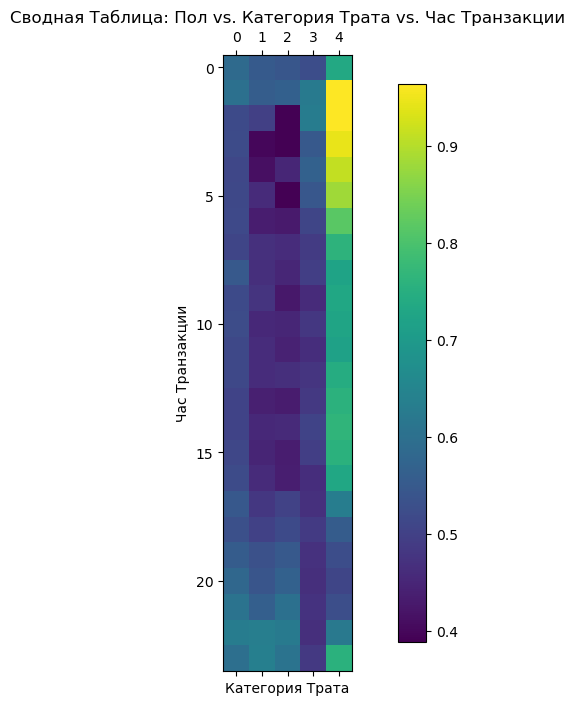

In [19]:
# Разбиение расходов на 5 бакетов
tran2['amount_bucket'] = pd.qcut(tran2['amount'], q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                                  labels=['Very Low', 'Low', 'Middle', 'High', 'Very High'])

# Отнесение неотрицательных трат к категории 'Income'
tran2['amount_bucket'] = tran2['amount_bucket'].cat.add_categories('Income').fillna('Income')

# Выделение часа из tr_datetime
tran2['tr_hour'] = tran2['tr_datetime'].str.split(':').str[0].str[-2:]

# Построение сводной таблицы
pivot_table = pd.pivot_table(tran2, values='gender', index='tr_hour', columns='amount_bucket', aggfunc='mean')

# Функция для отрисовки сводной таблицы
def plot_pivot_table(pivot_table):
    fig, ax = plt.subplots(figsize=(12, 8))
    cax = ax.matshow(pivot_table, cmap='viridis')
    fig.colorbar(cax, fraction=0.03, pad=0.05)
    plt.xlabel('Категория Трата')
    plt.ylabel('Час Транзакции')
    plt.title('Сводная Таблица: Пол vs. Категория Трата vs. Час Транзакции')
    С
    # Отрисовка сводной таблицы с русскими надписями
    fig, ax = plt.subplots(figsize=(12, 8))
    cax = ax.matshow(pivot_table, cmap='viridis')

    # Изменения для русских надписей
    plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=45)
    plt.yticks(range(len(pivot_table.index)), pivot_table.index)

    # Добавление цветовой шкалы
    cbar = plt.colorbar(cax, fraction=0.03, pad=0.05)
    cbar.set_label('Доля мужчин', rotation=270, labelpad=15)

    # Добавление осей и подписей
    plt.xlabel('Категория Трата')
    plt.ylabel('Час Транзакции')
    plt.title('Сводная Таблица: Пол vs. Категория Трата vs. Час Транзакции')
    plt.show()

# Отрисовка сводной таблицы
plot_pivot_table(pivot_table)

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [ ]:
# Type your code here
